In [2]:
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [3]:
dataset=pd.read_csv(r"C:\Users\shubh\Downloads\Coding\ML\house_price_regression_dataset.csv")
dataset.head(5)

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality,House_Price
0,1360,2,1,1981,0.599637,0,5,2.623829e+05
1,4272,3,3,2016,4.753014,1,6,9.852609e+05
2,3592,1,2,2016,3.634823,0,9,7.779774e+05
3,966,1,2,1977,2.730667,1,8,2.296989e+05
4,4926,2,1,1993,4.699073,0,8,1.041741e+06


In [4]:
dataset.isnull().sum()

Square_Footage          0
Num_Bedrooms            0
Num_Bathrooms           0
Year_Built              0
Lot_Size                0
Garage_Size             0
Neighborhood_Quality    0
House_Price             0
dtype: int64

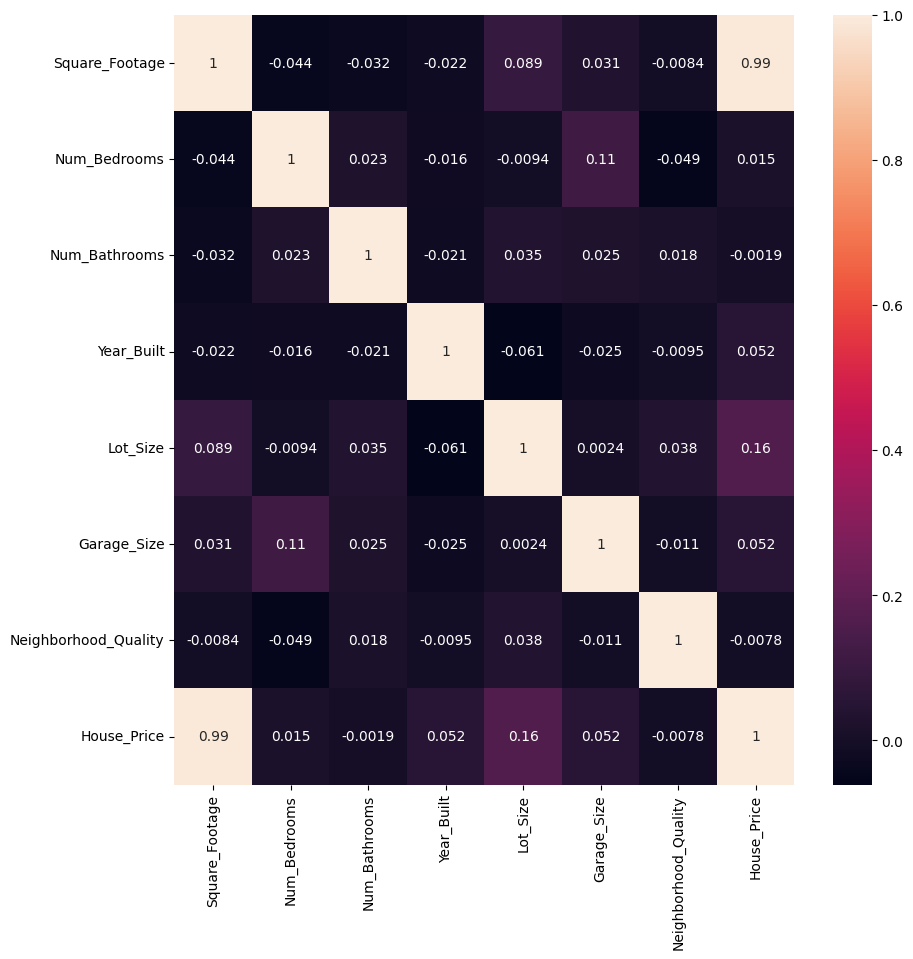

In [7]:
plt.figure(figsize=(10,10))
sns.heatmap(data=dataset.corr(),annot=True)
plt.show()

In [8]:
x=dataset.iloc[:,:-1]
y=dataset["House_Price"]

In [12]:
sc=StandardScaler()
sc.fit(x)
x=pd.DataFrame(sc.transform(x),columns=x.columns)
x

,Square_Footage,Num_Bedrooms,Num_Bathrooms,Year_Built,Lot_Size,Garage_Size,Neighborhood_Quality
0,-1.159803,-0.693836,-1.186699,-0.269122,-1.679278,-1.254658,-0.213126
1,1.160724,0.007008,1.252559,1.428045,1.522390,-0.027008,0.133420
2,0.618843,-1.394681,0.032930,1.428045,0.660422,-1.254658,1.173060
3,-1.473776,-1.394681,0.032930,-0.463084,-0.036555,-0.027008,0.826514
4,1.681887,-0.693836,-1.186699,0.312764,1.480809,-1.254658,0.826514
...,...,...,...,...,...,...,...
995,0.355074,0.707853,-1.186699,-0.414594,-0.472519,1.200641,1.519607
996,0.289730,-1.394681,0.032930,0.603707,0.153428,-0.027008,1.519607
997,-0.166885,0.707853,0.032930,-1.190442,0.984371,-1.254658,-1.252766
998,1.520119,1.408698,0.032930,-1.772328,-0.653046,-1.254658,0.479967


In [14]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
import numpy as np

In [15]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge

#LinearRegression

In [17]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr.score(x_test,y_test)*100

99.84263636823412

In [36]:
print(mean_squared_error(y_test,lr.predict(x_test)))
print(mean_absolute_error(y_test,lr.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,lr.predict(x_test))))

101434798.50563636
8174.583600006646
10071.484424137108


In [18]:
lr.coef_

array([250366.57881176,  14589.8296276 ,   6730.2708233 ,  20489.31651404,
        19310.12495234,   4191.87191768,    332.04368583])

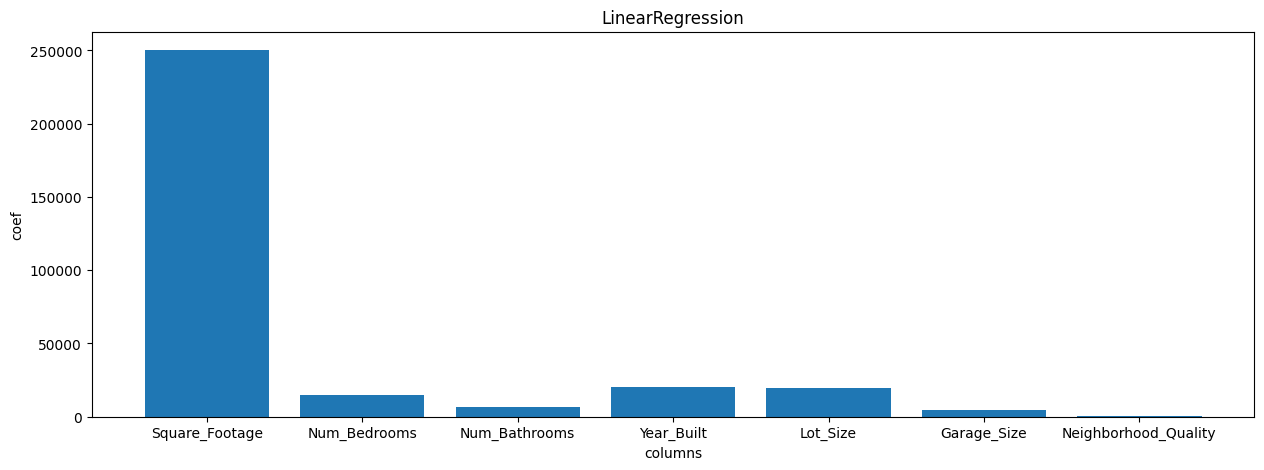

In [23]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,lr.coef_)
plt.title("LinearRegression")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [19]:
x.columns

Index(['Square_Footage', 'Num_Bedrooms', 'Num_Bathrooms', 'Year_Built',
       'Lot_Size', 'Garage_Size', 'Neighborhood_Quality'],
      dtype='object')

Lasso

In [41]:
la=Lasso(alpha=0.1)
la.fit(x_train,y_train)
la.score(x_test,y_test)*100

99.84263593271288

In [42]:
print(mean_squared_error(y_test,la.predict(x_test)))
print(mean_absolute_error(y_test,la.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,la.predict(x_test))))

101435079.23765102
8174.606876928061
10071.498361100548


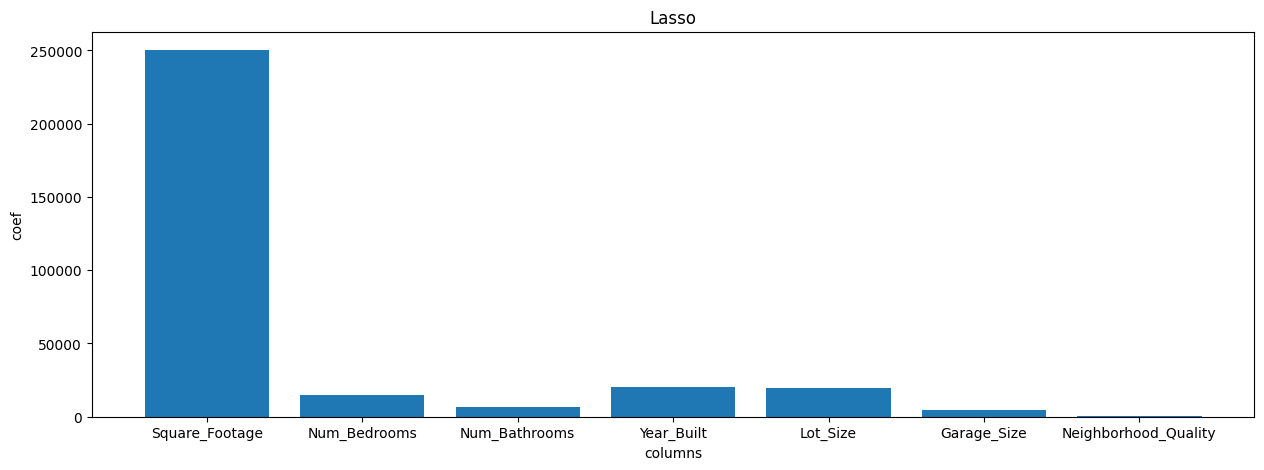

In [43]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,la.coef_)
plt.title("Lasso")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

Ridge

In [30]:
ri=Ridge(alpha=1)
ri.fit(x_train,y_train)
ri.score(x_test,y_test)

0.998410046605628

In [38]:
print(mean_squared_error(y_test,ri.predict(x_test)))
print(mean_absolute_error(y_test,ri.predict(x_test)))
print(np.sqrt(mean_squared_error(y_test,ri.predict(x_test))))

102486578.62156025
8241.898358133898
10123.565509323296


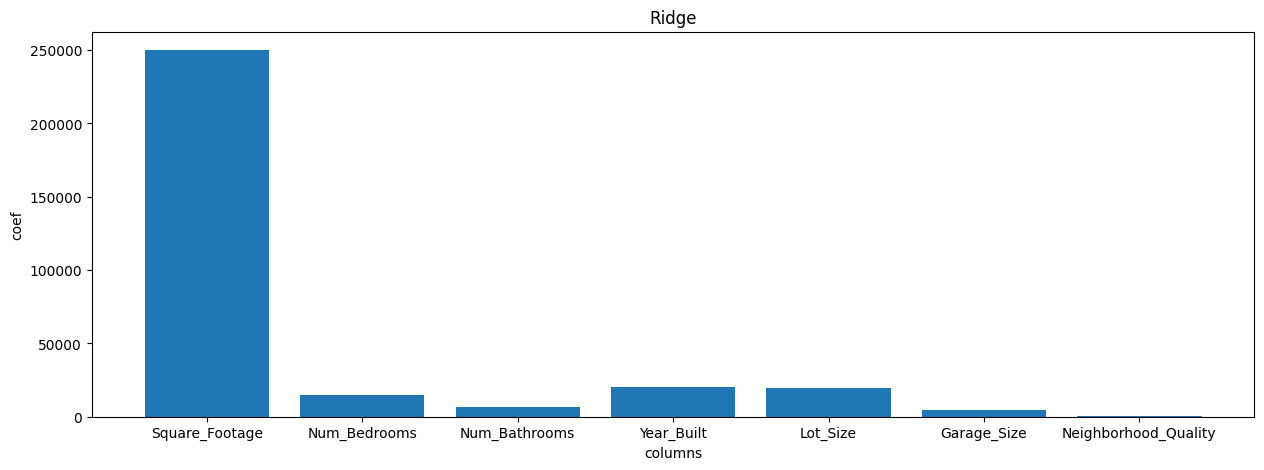

In [31]:
plt.figure(figsize=(15,5))
plt.bar(x.columns,ri.coef_)
plt.title("Ridge")
plt.xlabel("columns")
plt.ylabel("coef")
plt.show()

In [39]:
df=pd.DataFrame({"col_name":x.columns,"LinearRegression":lr.coef_,"Lasso":la.coef_,"Ridge":ri.coef_})

In [40]:
df

,col_name,LinearRegression,Lasso,Ridge
0,Square_Footage,250366.578812,250366.577718,250047.558231
1,Num_Bedrooms,14589.829628,14589.828675,14560.113601
2,Num_Bathrooms,6730.270823,6730.269878,6709.442473
3,Year_Built,20489.316514,20489.315442,20456.778953
4,Lot_Size,19310.124952,19310.124075,19324.293458
5,Garage_Size,4191.871918,4191.871074,4204.815995
6,Neighborhood_Quality,332.043686,332.042740,327.705642
